# v831 部署 Sobel 卷积边缘检测

边缘就是值变化剧烈的地方, 如果对值的变化求导, 则边缘部分就是导数局部最大。

但是在图像处理时没有具体的函数让我们求导, 使用卷积运算则可以很好的近似替代。

卷积运算是神经网络的最常用的基本运算，所以非常适合用来展示神经网络在 v831 上的部署过程。

## 边缘检测效果


In [1]:
'''
    simple sobel edge demo
    visit: https://neucrack.com/p/377
    @author neucrack
    @license MIT
'''
# 引入模块
import torch
import torch.nn as nn
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


In [2]:
# 定义一个网络模型
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 3, 3, padding=(0, 0), bias=False)
    def forward(self, x):
        x = self.conv1(x)
        return x
net = Net()


In [94]:
# 定义卷积权重
# sobel全边缘检测算子
conv_rgb_core_sobel = [
                        [[-1,-1,-1],[-1,8,-1], [-1,    -1,    -1],
                         [0,0,0],[0,0,0], [0,0,0],
                         [0,0,0],[0,0,0], [0,0,0]
                        ],
                        [[0,0,0],[0,0,0], [0,0,0],
                         [-1,-1,-1],[-1,8,-1], [-1,    -1,    -1],
                         [0,0,0],[0,0,0], [0,0,0]
                        ],
                        [[0,0,0],[0,0,0], [0,0,0],
                         [0,0,0],[0,0,0], [0,0,0],
                         [-1,-1,-1],[-1,8,-1], [-1,    -1,    -1],
                        ]]

# sobel垂直边缘检测算子
conv_rgb_core_sobel_vertical = [
                        [[-1,0,1],[-2,0,2], [-1,    0,    1],
                         [0,0,0],[0,0,0], [0,0,0],
                         [0,0,0],[0,0,0], [0,0,0]
                        ],
                        [[0,0,0],[0,0,0], [0,0,0],
                         [-1,0,1],[-2,0,2], [-1,    0,    1],
                         [0,0,0],[0,0,0], [0,0,0]
                        ],
                        [[0,0,0],[0,0,0], [0,0,0],
                         [0,0,0],[0,0,0], [0,0,0],
                         [-1,0,1],[-2,0,2], [-1,    0,    1],
                        ]]

# sobel水平边缘检测算子
conv_rgb_core_sobel_horizontal = [
                        [[1,2,1],[0,0,0], [-1, -2, -1],
                         [0,0,0],[0,0,0], [0,0,0],
                         [0,0,0],[0,0,0], [0,0,0]
                        ],
                        [[0,0,0],[0,0,0], [0,0,0],
                         [1,2,1],[0,0,0], [-1, -2, -1],
                         [0,0,0],[0,0,0], [0,0,0]
                        ],
                        [[0,0,0],[0,0,0], [0,0,0],
                         [0,0,0],[0,0,0], [0,0,0],
                         [1,2,1],[0,0,0], [-1, -2, -1],
                        ]]



In [95]:
# 网络载入权重函数
def sobel(net, kernel):
    sobel_kernel = np.array(kernel,    dtype='float32')
    sobel_kernel = sobel_kernel.reshape((3,    3,    3,    3))
    net.conv1.weight.data = torch.from_numpy(sobel_kernel)
params = list(net.parameters())

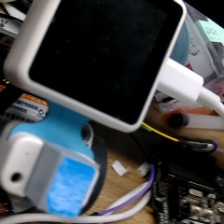

(224, 224, 3)


In [96]:
# 打开一张图片
pil_img = Image.open("/home/nihao/work/lin/pictures/class1_5.jpg")
display(pil_img)
input_img = np.array(pil_img)
print(input_img.shape)


In [97]:
# 图片归一化处理
input_tensor = (input_img.astype(np.float32) - 127.5) / 128 # to [-1, 1]

print(input_tensor.shape)

input_tensor = torch.Tensor(input_tensor).permute((2, 0, 1))

input_tensor = input_tensor.unsqueeze(0)

print("input shape:", input_tensor.shape)


(224, 224, 3)
input shape: torch.Size([1, 3, 224, 224])


In [98]:
# 将入片转换成 pytorch 张量
input_tensor = (input_img.astype(np.float32) - 127.5) / 128 # to [-1, 1]
input_tensor = torch.Tensor(input_tensor).permute((2, 0, 1))
print(input_tensor.shape)
input_tensor = input_tensor.unsqueeze(0)
print("input shape:", input_tensor.shape)


torch.Size([3, 224, 224])
input shape: torch.Size([1, 3, 224, 224])


In [114]:

global sobel_img 
global sobel_vertical_img
global sobel_horizontal_img 



sobel_img = None
sobel_vertical_img = None
sobel_horizontal_img = None

#载入网络权重
sobel(net, conv_rgb_core_sobel_vertical)
#在推理模式下运行网络
with torch.no_grad():
    out = net(input_tensor)
    sobel_vertical_img_t = out.numpy()[0].transpose([1,2,0])

    

#载入网络权重
sobel(net, conv_rgb_core_sobel_horizontal)
#在推理模式下运行网络
with torch.no_grad():
    out = net(input_tensor)
    sobel_horizontal_img_t = out.numpy()[0].transpose([1,2,0])

    
#载入网络权重
sobel(net, conv_rgb_core_sobel)
#在推理模式下运行网络
with torch.no_grad():
    out = net(input_tensor)
    sobel_img_t = out.numpy()[0].transpose([1,2,0])




Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

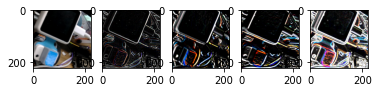

In [119]:
plt.figure()
plt.figure()
plt.subplot(1, 5, 1)
plt.imshow(input_img)
plt.subplot(1, 5, 2)
plt.imshow(sobel_img_t)
plt.subplot(1, 5, 3)
plt.imshow(sobel_vertical_img_t)
plt.subplot(1, 5, 4)
plt.imshow(sobel_horizontal_img_t)
plt.subplot(1, 5, 5)
out = np.sqrt(np.square(sobel_vertical_img_t) + np.square(sobel_horizontal_img_t))
plt.imshow(out)
plt.show()

In [120]:
# 导出onnx网络
with torch.no_grad():
    torch.onnx.export(net, input_tensor, "./model.onnx", export_params=True, input_names = ["input0"], output_names=["output0"])
    print("导出网络完成！")

导出网络完成！


In [121]:
# 使用ncnn 工具将 onnx 网络转换成 ncnn网络
def onnx_to_ncnn(input_shape, onnx="out/model.onnx", ncnn_param="out/conv0.param", ncnn_bin = "out/conv0.bin"):
    import os
    # onnx2ncnn tool compiled from ncnn/tools/onnx, and in the buld dir
    cmd = f"onnx2ncnn {onnx} {ncnn_param} {ncnn_bin}"       #可以更换工具目录
    os.system(cmd)
    with open(ncnn_param) as f:
        content = f.read().split("\n")
        if len(input_shape) == 1:
            content[2] += " 0={}".format(input_shape[0])
        else:
            content[2] += " 0={} 1={} 2={}".format(input_shape[2], input_shape[1], input_shape[0])
        content = "\n".join(content)
    with open(ncnn_param, "w") as f:
        f.write(content)

onnx_to_ncnn(input_shape = (3, 224, 224), onnx = "./model.onnx", ncnn_param="./conv0.param", ncnn_bin = "./conv0.bin")
        

sh:行1: onnx2ncnn：未找到命令


FileNotFoundError: [Errno 2] No such file or directory: './conv0.param'

# 使用在线量化工具进行网络量化！

导出网络完成！


Net(
  (conv1): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), bias=False)
)

In [12]:
import torch.onnx

In [15]:


torch.onnx.export(net, input_tensor, "/home/nihao/work/work_space/wiki/model.onnx", export_params=True, input_names = ["input0"], output_names=["output0"])

# torch.onnx.export(net,               # model being run
#                   input_tensor,                         # model input (or a tuple for multiple inputs)
#                   "/home/nihao/work/work_space/wiki/super_resolution.onnx",   # where to save the model (can be a file or file-like object)
#                   export_params=True,        # store the trained parameter weights inside the model file
#                   opset_version=10,          # the ONNX version to export the model to
#                   do_constant_folding=True,  # whether to execute constant folding for optimization
#                   input_names = ['input'],   # the model's input names
#                   output_names = ['output'], # the model's output names
#                   dynamic_axes={'input' : {0 : 'batch_size'},    # variable lenght axes
#                                 'output' : {0 : 'batch_size'}})

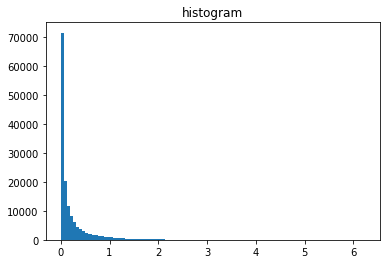

In [105]:
ma = np.abs(out)

# mb = mb * 255 / mb.max()

# mb = np.around(mb).astype(np.uint8)


mb = ma.flatten()

bins = []

cous = 100

mka = mb.max() / cous




for i in range(0,cous):
    bins.append(mka * i)

    
# print(bins)
plt.hist(mb, bins =  bins) 
plt.title("histogram") 
plt.show()



# mc = np.histogram(mb)

# print(mc)

# print(mb)


# mc = mb

# # md_max = md.max()

# # md_min = md.min()


# # print(md_max, md_min)

# # print(mc)
# plt.imshow(mc)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


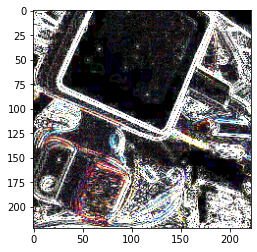

In [72]:
md = np.abs(out)


mc = md * 3

# md_max = md.max()

# md_min = md.min()


# print(md_max, md_min)

# print(md)
plt.imshow(mc)

In [ ]:
a1 = out

print("数据类型",type(a1))           #打印数组数据类型  
print("数组元素数据类型：",a1.dtype) #打印数组元素数据类型  
print("数组元素总数：",a1.size)      #打印数组尺寸，即数组元素总数  
print("数组形状：",a1.shape)         #打印数组形状  
print("数组的维度数目",a1.ndim)      #打印数组的维度数目

In [ ]:
sobel(net, conv_rgb_core_sobel_vertical)
out_v = net(input_tensor).detach().numpy()[0].transpose([1,2,0])

sobel(net, conv_rgb_core_sobel_horizontal)
out_h = net(input_tensor).detach().numpy()[0].transpose([1,2,0])


In [ ]:

print("out shape: {}, tensor:{}".format(out.shape, out))
print(out.shape, out.max(), out.min())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.99609375 -0.99609375
6.3046875 -4.0546875


<Figure size 432x288 with 0 Axes>

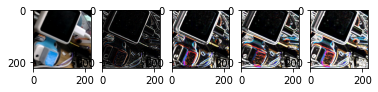

In [9]:
plt.figure()
plt.figure()
plt.subplot(1, 5, 1)
input = input_tensor.numpy()[0].transpose((1,2,0))
print(input.max(), input.min())
plt.imshow(input_img)
plt.subplot(1, 5, 2)
print(out.max(), out.min())
# out = np.sqrt(np.square(out))
# out = out * 255.0 / out.max()
# out = out.astype(np.uint8)
# print(out.max(), out.min())
plt.imshow(out)
plt.subplot(1, 5, 3)
out = np.abs(out_v)
# out = out * 255.0 / out.max()
# plt.imshow(out.astype(np.uint8))
plt.imshow(out)
plt.subplot(1, 5, 4)
out = np.abs(out_h)
# out = out * 255.0 / out.max()
# plt.imshow(out.astype(np.uint8))
plt.imshow(out)
plt.subplot(1, 5, 5)
out = np.sqrt(np.square(out_v) + np.square(out_h))
# out = out * 255.0 / out.max()
# plt.imshow(out.astype(np.uint8))
plt.imshow(out)
plt.show()